In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

In [2]:
df = pd.read_csv("act_table2.csv", index_col = 0)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,ids,date,activities,activity_level
0,1,2020-02-01 0:00,sleep,sleep
1,1,2020-02-01 1:00,sleep,sleep
2,1,2020-02-01 2:00,sleep,sleep
3,1,2020-02-01 3:00,sleep,sleep
4,1,2020-02-01 4:00,sleep,sleep


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020500 entries, 0 to 1020499
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ids             1020500 non-null  int64 
 1   date            1020500 non-null  object
 2   activities      1020500 non-null  object
 3   activity_level  1020500 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.9+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['day'] = df['date'].dt.to_period('D')

In [7]:
df.head()

,ids,date,activities,activity_level,day
0,1,2020-02-01 00:00:00,sleep,sleep,2020-02-01
1,1,2020-02-01 01:00:00,sleep,sleep,2020-02-01
2,1,2020-02-01 02:00:00,sleep,sleep,2020-02-01
3,1,2020-02-01 03:00:00,sleep,sleep,2020-02-01
4,1,2020-02-01 04:00:00,sleep,sleep,2020-02-01


In [8]:
user_experience = df.groupby(["day", "activities", "ids", "activity_level" ]).agg(["count"])

In [9]:
user_experience = user_experience.reset_index()

In [10]:
user_experience.head(10)

,day,activities,ids,activity_level,date
,,,,,count
0,2020-02-01,Exercise,1,Run,1
1,2020-02-01,Exercise,2,Yoga,1
2,2020-02-01,Exercise,3,Dancing,2
3,2020-02-01,Exercise,4,Dancing,2
4,2020-02-01,Exercise,5,Pilates,1
5,2020-02-01,Exercise,6,Climbing stairs or hills,1
6,2020-02-01,Exercise,7,Stretching exercise,1
7,2020-02-01,Exercise,8,Biking,1
8,2020-02-01,Exercise,9,Run,2


In [11]:
user_experience.columns = ["day", "activities", "User_id", "activity_level", "activity_level count hours"]

In [12]:
user_experience.head()

,day,activities,User_id,activity_level,activity_level count hours
0,2020-02-01,Exercise,1,Run,1
1,2020-02-01,Exercise,2,Yoga,1
2,2020-02-01,Exercise,3,Dancing,2
3,2020-02-01,Exercise,4,Dancing,2
4,2020-02-01,Exercise,5,Pilates,1


In [13]:
df_rec =user_experience.groupby(["User_id","activities","activity_level"]).agg(["sum"])

In [14]:
df_rec = df_rec.reset_index()

In [15]:
df_rec.head()

,User_id,activities,activity_level,activity_level count hours
,,,,sum
0,1,Exercise,Go for a walk,3
1,1,Exercise,Jogging,7
2,1,Exercise,Jump,1
3,1,Exercise,Run,76
4,1,Exercise,Weight lift,7


In [16]:
df_rec.columns = ["User_id", "activities", "activity_level", "total hours"]

In [17]:
df_rec

,User_id,activities,activity_level,total hours
0,1,Exercise,Go for a walk,3
1,1,Exercise,Jogging,7
2,1,Exercise,Jump,1
3,1,Exercise,Run,76
4,1,Exercise,Weight lift,7
...,...,...,...,...
26892,500,Personal activity,prepare lunch,12
26893,500,Work,Answering emails,150
26894,500,Work,Vitual/in-person Meeting,153
26895,500,Work,Work,476


In [18]:
from sklearn import preprocessing

In [19]:
activity = df_rec["activity_level"]
activity.shape

(26897,)

In [20]:
le = preprocessing.LabelEncoder()
le.fit(activity)

result = le.transform(activity)

In [21]:
data = pd.DataFrame({"activity_level" : activity, "code" : result})


In [22]:
data.head()

,activity_level,code
0,Go for a walk,10
1,Jogging,15
2,Jump,16
3,Run,29
4,Weight lift,44


In [23]:
data.shape

(26897, 2)

In [24]:
df_rec["act_encoded"] = data["code"]

In [25]:
df_rec.head()

,User_id,activities,activity_level,total hours,act_encoded
0,1,Exercise,Go for a walk,3,10
1,1,Exercise,Jogging,7,15
2,1,Exercise,Jump,1,16
3,1,Exercise,Run,76,29
4,1,Exercise,Weight lift,7,44


In [26]:
df_model = df_rec[["User_id","act_encoded", "total hours"]].copy()

x = df_model.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled

from sklearn.preprocessing import StandardScaler
x = df_model.values
scaler = StandardScaler()
scaler.fit(x)
scaled = scaler.transform(x)
df_scaled = pd.DataFrame(scaled)
df_scaled.max()

In [27]:
#df_model["hours_scaled"] = df_scaled[2]

In [28]:
df_model.head()

,User_id,act_encoded,total hours
0,1,10,3
1,1,15,7
2,1,16,1
3,1,29,76
4,1,44,7


In [29]:
#df_model.drop("total hours", axis = 1, inplace = True)

(array([165.,   3.,   2.,   1.,   2.,   1.,   1.,   2.,   3.,   2.]),
 array([1.0000e+00, 2.5280e+02, 5.0460e+02, 7.5640e+02, 1.0082e+03,
        1.2600e+03, 1.5118e+03, 1.7636e+03, 2.0154e+03, 2.2672e+03,
        2.5190e+03]),
 <a list of 10 Patch objects>)

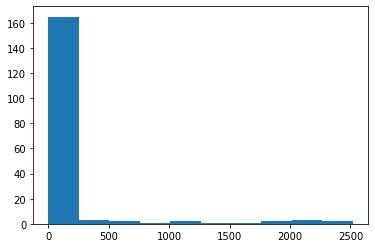

In [30]:
plt.hist(df_model["total hours"].value_counts())

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size=0.2, random_state=42)

In [32]:
train.head()

,User_id,act_encoded,total hours
2450,48,46,8
6108,116,2,8
26854,500,32,9
25328,471,37,161
25570,476,7,9


In [33]:
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
#from tensorflow.keras.layers import merge
from tensorflow.keras.layers import Concatenate, Average, Multiply, Dot
from tensorflow.keras.layers import dot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Dot, Dense, Concatenate


In [34]:
def embedding_input(name,n_in,n_out,reg):
    inp = Input(shape = (1,), dtype = "int64", name = name)
    return inp, Embedding(n_in,n_out,input_length = 1)(inp)

In [35]:
n_users = df_model.User_id.nunique() +1
n_act = df_model.act_encoded.nunique() +1
n_users,n_act
n_factors = 150

In [36]:
n_users

501

In [37]:
user_in, u=embedding_input("user_in", n_users,n_factors, 1e-4)
act_in, m=embedding_input("act_in",n_act,n_factors, 1e-4)
m

<tf.Tensor 'embedding_1/embedding_lookup/Identity_1:0' shape=(?, 1, 150) dtype=float32>

In [38]:
x = Dot(axes=1)([u,m])
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(70, activation = "relu")(x)
x = Dropout(0.3)(x)
x = Dense(1)(x)
nn = Model([user_in,act_in], x)
nn.compile('adam', 'mean_squared_error')

In [39]:
nn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_in (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
act_in (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 150)       75150       user_in[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 150)       8250        act_in[0][0]                     
__________________________________________________________________________________________________
dot (Dot) 

In [40]:
from tensorflow.keras.models import load_model

if os.path.exists('rec_model4.h5'):
    nn= load_model('rec_model4.h5')
else:
    history = nn.fit([train.User_id, train.act_encoded], train["total hours"], epochs=7, verbose=1)
    nn.save('rec_model4.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [41]:
nn.evaluate([test.User_id, test.act_encoded], test["total hours"])

5380/5380 [==============================] - 1s 214us/step


73.26048836335816

In [42]:
predictions = nn.predict([test.User_id, test.act_encoded])

In [43]:
predictions

array([[11.769831],
       [11.767425],
       [14.477127],
       ...,
       [15.985168],
       [ 8.115228],
       [11.325401]], dtype=float32)

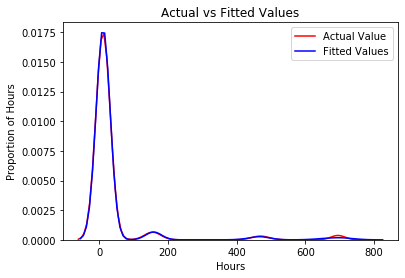

In [44]:
import seaborn as sns
plt.figure()


ax1 = sns.distplot(test["total hours"], hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Hours')
plt.ylabel('Proportion of Hours')

plt.show()
plt.close()

In [45]:
test["predictions"] = predictions
test.head(30)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,User_id,act_encoded,total hours,predictions
23760,442,52,19,11.769831
26555,494,28,11,11.767425
7708,145,27,6,14.477127
20983,391,12,12,12.171482
23975,446,51,11,13.348793
17577,328,43,14,13.088409
14214,266,21,12,8.578506
21163,394,47,13,11.912300
99,3,9,7,13.425543
2501,49,30,9,7.276319


In [46]:
# Extract embeddings

act_em = nn.get_layer('embedding_1')
act_em_weights = act_em.get_weights()[0]



act_em_weights.shape
act_em_weights

array([[ 0.36411008, -0.0307833 ,  0.4173095 , ...,  0.14391533,
         0.7041945 ,  0.25456113],
       [ 0.28155875,  0.26518995,  0.4055286 , ...,  0.77471226,
        -0.05128094, -0.03263947],
       [ 0.7361061 ,  0.53488934,  0.7847555 , ...,  0.3398362 ,
         0.35277206,  0.12068364],
       ...,
       [ 0.23209003,  0.22004646,  0.23529848, ..., -0.10516872,
         0.28366193,  0.34738764],
       [ 0.8274757 ,  0.29661232,  0.79437137, ...,  0.9563363 ,
         0.8165867 ,  0.8241336 ],
       [ 0.37350595,  0.2312423 ,  0.75355136, ...,  0.49557614,
         0.3018484 ,  0.01699317]], dtype=float32)

In [47]:
act_em_weights = act_em_weights / np.linalg.norm(act_em_weights, axis = 1).reshape((-1, 1))
act_em_weights[0][:10]
np.sum(np.square(act_em_weights[50]))

1.0000001

In [48]:
act_id_em = df_model["act_encoded"].unique()
len(act_id_em)


54

In [49]:
activity_df = pd.DataFrame(act_em_weights)

activity_df = activity_df.drop(54)

In [50]:
activity_df["act_id"] = act_id_em

#activity_df = activity_df.set_index("act_id")
activity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,act_id
0,0.057178,-0.004834,0.065532,0.115973,0.145327,0.043171,0.085932,0.080348,0.004415,0.008227,...,0.010541,0.048418,0.089544,0.126173,0.105729,0.129507,0.022600,0.110582,0.039975,10
1,0.042986,0.040487,0.061912,0.044404,-0.001265,0.046350,0.043862,0.117278,0.145681,-0.010669,...,0.065419,0.106435,0.046652,0.129967,0.024858,0.052769,0.118276,-0.007829,-0.004983,15
2,0.106262,0.077215,0.113285,0.064579,0.053443,-0.000413,0.110950,0.030789,0.120542,0.019987,...,0.115856,0.082025,-0.017247,0.059384,0.047351,-0.018801,0.049058,0.050925,0.017421,16
3,0.016591,0.124861,0.060464,0.085673,0.104671,-0.011084,0.060904,0.036836,0.145602,0.083930,...,0.106193,0.063665,0.072830,0.127746,0.115572,0.048306,0.045210,-0.010216,0.051758,29
4,0.012991,0.070816,0.027944,0.045310,0.043114,0.128013,0.092492,0.120707,0.058636,0.117498,...,0.103588,0.106314,0.097507,0.051102,0.077914,-0.011863,0.012749,0.096785,0.087283,44


In [51]:
df_rec.head()

,User_id,activities,activity_level,total hours,act_encoded
0,1,Exercise,Go for a walk,3,10
1,1,Exercise,Jogging,7,15
2,1,Exercise,Jump,1,16
3,1,Exercise,Run,76,29
4,1,Exercise,Weight lift,7,44


In [53]:
act_names = df_rec[["act_encoded", "activity_level"]].copy()

In [54]:
act_names = act_names.drop_duplicates()

In [55]:
act_names.columns = ["act_id", "activity_level"]

In [56]:
act_df = pd.merge(activity_df, act_names, how = "left")

In [57]:
act_df.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,act_id,activity_level
0,0.057178,-0.004834,0.065532,0.115973,0.145327,0.043171,0.085932,0.080348,0.004415,0.008227,...,0.048418,0.089544,0.126173,0.105729,0.129507,0.022600,0.110582,0.039975,10,Go for a walk
1,0.042986,0.040487,0.061912,0.044404,-0.001265,0.046350,0.043862,0.117278,0.145681,-0.010669,...,0.106435,0.046652,0.129967,0.024858,0.052769,0.118276,-0.007829,-0.004983,15,Jogging
2,0.106262,0.077215,0.113285,0.064579,0.053443,-0.000413,0.110950,0.030789,0.120542,0.019987,...,0.082025,-0.017247,0.059384,0.047351,-0.018801,0.049058,0.050925,0.017421,16,Jump
3,0.016591,0.124861,0.060464,0.085673,0.104671,-0.011084,0.060904,0.036836,0.145602,0.083930,...,0.063665,0.072830,0.127746,0.115572,0.048306,0.045210,-0.010216,0.051758,29,Run
4,0.012991,0.070816,0.027944,0.045310,0.043114,0.128013,0.092492,0.120707,0.058636,0.117498,...,0.106314,0.097507,0.051102,0.077914,-0.011863,0.012749,0.096785,0.087283,44,Weight lift


In [68]:
act_df.iloc[1, 151]

'Jogging'

In [74]:
def find_similarity_total(act_name):
    """Recommends activities based on the cosine similarity between acts"""
    cosine_list_total = []
    act_name3 = []
    act_name4 = []

    for i in range(0,act_df.shape[0]):
        tent4 = act_df.iloc[i,0:150]
        tent5 = act_df[act_df["activity_level"] == act_name]
        tent6 = tent5.iloc[0,0:150]
        cosine_total = np.dot(tent6,tent4)
        
        act3 = tent5.iloc[0,151]
        act4 = act_df.iloc[i,151]
        cosine_list_total.append(cosine_total)
        act_name3.append(act3)
        act_name4.append(act4)
        
        
    cosine_df_total = pd.DataFrame({"act1" : act_name3, "act2" : act_name4, "cosine" : cosine_list_total})
    cosine_df_total = cosine_df_total.sort_values(by="cosine", ascending = False)
    return cosine_df_total.iloc[1:10,:]

In [75]:
find_similarity_total("Run")

,act1,act2,cosine
4,Run,Weight lift,0.788282
24,Run,Pick up groceries,0.784432
39,Run,play with kids,0.771882
12,Run,Take out the trash,0.771628
43,Run,Vitual/in-person Meeting,0.767610
42,Run,Answering emails,0.765782
13,Run,Wash the car,0.762462
22,Run,Online learning,0.760758
16,Run,Get dressed,0.760345
